In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Company_Data.csv')
df.head()

<IPython.core.display.Javascript object>

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
df.shape

(400, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [8]:
df.isnull()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [10]:
df.isna()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isna().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

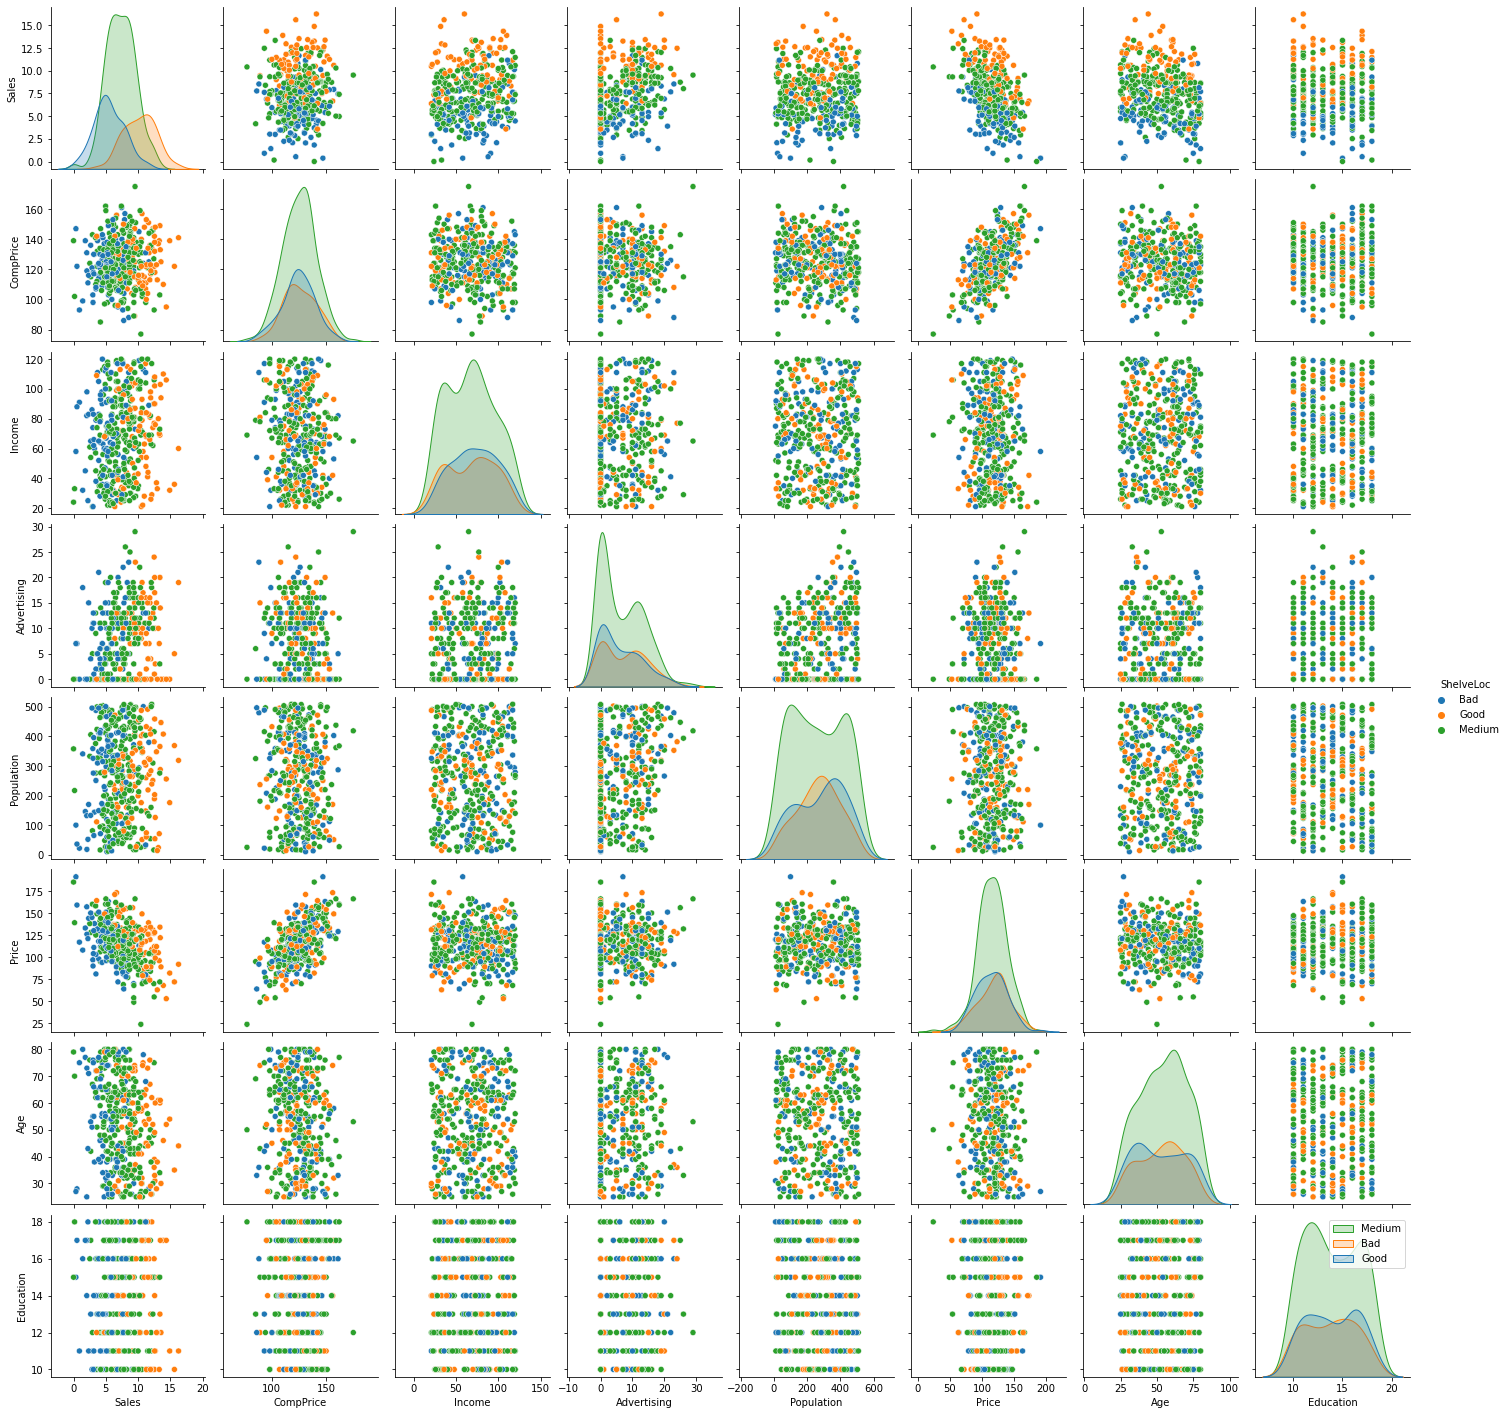

In [20]:
sns.pairplot(df,hue='ShelveLoc')
plt.legend(df['ShelveLoc'].value_counts().index)

# getting data ready for model building

In [21]:
lab_enco = LabelEncoder()
df['ShelveLoc']=lab_enco.fit_transform(df['ShelveLoc'])
df['Urban']=lab_enco.fit_transform(df['Urban'])
df['US']=lab_enco.fit_transform(df['US'])


In [22]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [23]:
sales_status = []

for i in df['Sales']:
    if i>=7.5:
        sales_status.append('High sales')
    else:
        sales_status.append('Low sales')

df['sales_status'] = sales_status
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_status
0,9.50,138,73,11,276,120,0,42,17,1,1,High sales
1,11.22,111,48,16,260,83,1,65,10,1,1,High sales
2,10.06,113,35,10,269,80,2,59,12,1,1,High sales
3,7.40,117,100,4,466,97,2,55,14,1,1,Low sales
4,4.15,141,64,3,340,128,0,38,13,1,0,Low sales
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,High sales
396,6.14,139,23,3,37,120,2,55,11,0,1,Low sales
397,7.41,162,26,12,368,159,2,40,18,1,1,Low sales
398,5.94,100,79,7,284,95,0,50,12,1,1,Low sales


In [24]:
x = df.iloc[:,1:-1]
y=df.iloc[:,-1]
print(x)
print(y)

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
247        123     114            0         298    151          0   34   
110        128      62            7         125    116          2   43   
16         118      32            0         284    110          1   63   
66         127      92            0         508     91          2   56   
153        150      36            7         488    150          2   25   
..         ...     ...          ...         ...    ...        ...  ...   
71         148      51           16         148    150          2   58   
106        102      33            0         217    139          2   70   
270        119      26            0         284     89          1   26   
348        132     102           20         459    107          1   49   
102        113      22            0          57     97          2   65   

     Education  Urban  US  
247         16      1   0  
110         14      1   1  
16          13      1   0  

# building DT

In [31]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=2)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

<IPython.core.display.Javascript object>

[Text(0.5, 0.8333333333333334, 'X[4] <= 92.5\nentropy = 1.0\nsamples = 300\nvalue = [147, 153]'),
 Text(0.25, 0.5, 'X[5] <= 0.5\nentropy = 0.378\nsamples = 41\nvalue = [38, 3]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.845\nsamples = 11\nvalue = [8, 3]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(0.75, 0.5, 'X[4] <= 135.5\nentropy = 0.982\nsamples = 259\nvalue = [109, 150]'),
 Text(0.625, 0.16666666666666666, 'entropy = 1.0\nsamples = 206\nvalue = [102, 104]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.563\nsamples = 53\nvalue = [7, 46]')]

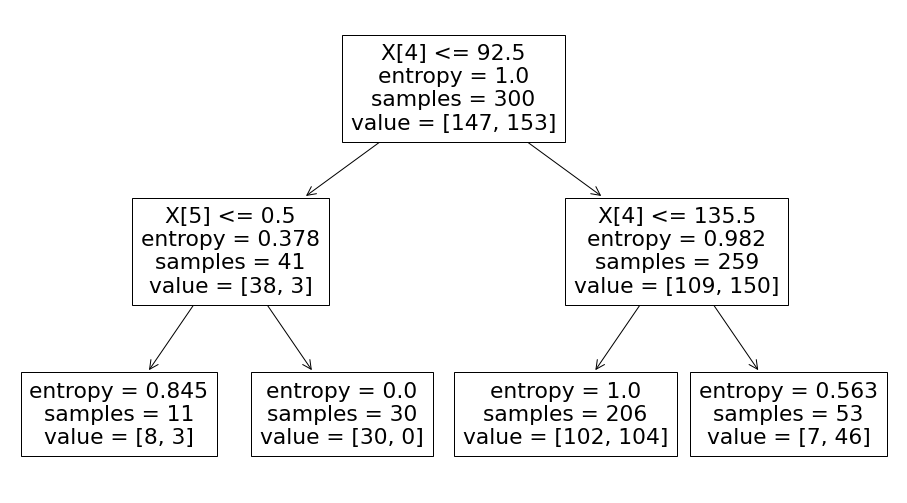

In [32]:
plt.figure(figsize=(16,9))
plot_tree(model)

<IPython.core.display.Javascript object>

[Text(0.5, 0.8333333333333334, 'Population <= 92.5\nentropy = 1.0\nsamples = 300\nvalue = [147, 153]\nclass = Low sales'),
 Text(0.25, 0.5, 'Price <= 0.5\nentropy = 0.378\nsamples = 41\nvalue = [38, 3]\nclass = High sales'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.845\nsamples = 11\nvalue = [8, 3]\nclass = High sales'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 30\nvalue = [30, 0]\nclass = High sales'),
 Text(0.75, 0.5, 'Population <= 135.5\nentropy = 0.982\nsamples = 259\nvalue = [109, 150]\nclass = Low sales'),
 Text(0.625, 0.16666666666666666, 'entropy = 1.0\nsamples = 206\nvalue = [102, 104]\nclass = Low sales'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.563\nsamples = 53\nvalue = [7, 46]\nclass = Low sales')]

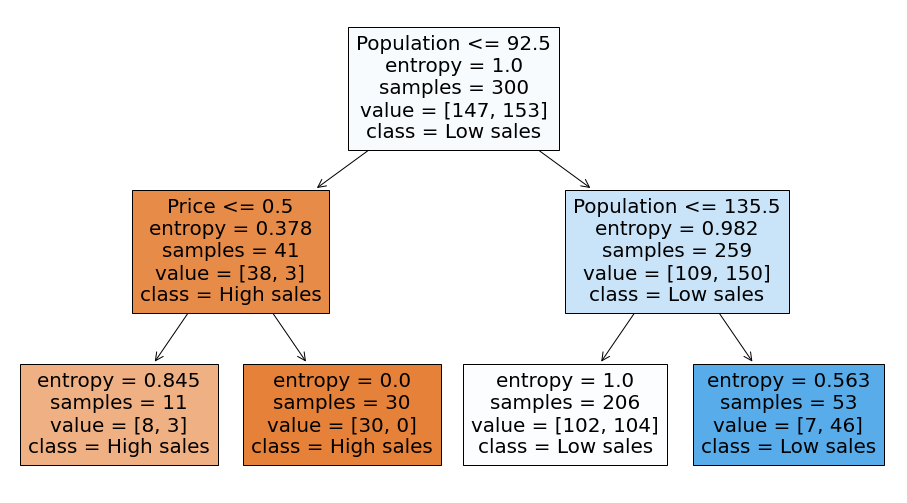

In [35]:
plt.figure(figsize=(16,9))
cn=['High sales','Low sales']
plot_tree(model,feature_names=df.columns,class_names=cn,filled=True)

In [38]:
y_pred = model.predict(x_test)

In [37]:
pd.DataFrame({'y_test':y_test,'y_pred':model.predict(x_test)})

<IPython.core.display.Javascript object>

,y_test,y_pred
209,Low sales,High sales
280,Low sales,Low sales
33,High sales,Low sales
210,Low sales,Low sales
93,High sales,Low sales
...,...,...
314,High sales,Low sales
373,Low sales,Low sales
380,High sales,High sales
239,Low sales,Low sales


In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

  High sales       0.76      0.31      0.44        52
   Low sales       0.54      0.90      0.68        48

    accuracy                           0.59       100
   macro avg       0.65      0.60      0.56       100
weighted avg       0.66      0.59      0.55       100



In [42]:
accuracy_score(y_test,y_pred)

0.59

In [43]:
pd.crosstab(y_test,y_pred)

<IPython.core.display.Javascript object>

col_0,High sales,Low sales
sales_status,,
High sales,16,36
Low sales,5,43


In [44]:
np.mean(y_test==y_pred)

<IPython.core.display.Javascript object>

0.59

# decision tree regressor

In [49]:
x1 = df.iloc[:,1:-1]
y1=df.iloc[:,0]
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.25)

In [51]:
model_reg = DecisionTreeRegressor(max_depth=2)
model_reg.fit(x1_train,y1_train)

DecisionTreeRegressor(max_depth=2)

In [53]:
y1_pred = model_reg.predict(x1_test)

<IPython.core.display.Javascript object>

[Text(0.5, 0.8333333333333334, 'X[4] <= 94.5\nsquared_error = 7.646\nsamples = 300\nvalue = 7.478'),
 Text(0.25, 0.5, 'X[5] <= 0.5\nsquared_error = 4.653\nsamples = 55\nvalue = 9.879'),
 Text(0.125, 0.16666666666666666, 'squared_error = 2.476\nsamples = 16\nvalue = 8.05'),
 Text(0.375, 0.16666666666666666, 'squared_error = 3.61\nsamples = 39\nvalue = 10.629'),
 Text(0.75, 0.5, 'X[5] <= 0.5\nsquared_error = 6.734\nsamples = 245\nvalue = 6.94'),
 Text(0.625, 0.16666666666666666, 'squared_error = 3.545\nsamples = 56\nvalue = 4.943'),
 Text(0.875, 0.16666666666666666, 'squared_error = 6.147\nsamples = 189\nvalue = 7.531')]

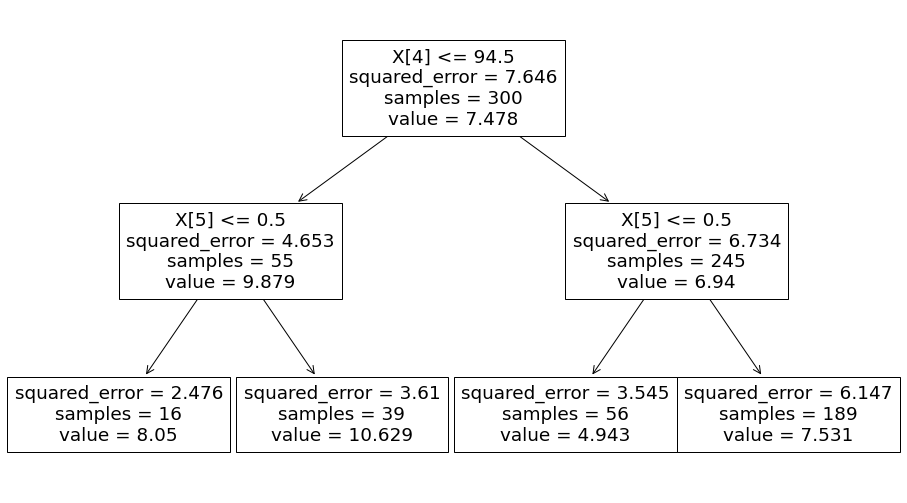

In [55]:
plt.figure(figsize=(16,9))
plot_tree(model_reg)